<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis/blob/main/Heart_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msn
import plotly.express as px

In [47]:
# load the dataset
heart_analysis = pd.read_csv('/content/heart_2022_with_nans.csv')

ParserError: Error tokenizing data. C error: Expected 40 fields in line 3330, saw 68


In [4]:
# data exploration
heart_analysis.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [44]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386196 entries, 0 to 386195
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      386196 non-null  object 
 1   Sex                        386196 non-null  object 
 2   GeneralHealth              386196 non-null  object 
 3   PhysicalHealthDays         386196 non-null  float64
 4   MentalHealthDays           386196 non-null  float64
 5   LastCheckupTime            378935 non-null  object 
 6   PhysicalActivities         386196 non-null  object 
 7   SleepHours                 386196 non-null  float64
 8   RemovedTeeth               386196 non-null  object 
 9   HadHeartAttack             386196 non-null  object 
 10  HadAngina                  386196 non-null  object 
 11  HadStroke                  386196 non-null  object 
 12  HadAsthma                  386196 non-null  object 
 13  HadSkinCancer              38

## Data Cleaning

In [45]:
# cheking missing values
heart_analysis.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,7261
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [43]:
# percentage of missing values
heart_analysis.isnull().mean()*100

,0
State,0.000000
Sex,0.000000
GeneralHealth,0.000000
PhysicalHealthDays,0.000000
MentalHealthDays,0.000000
LastCheckupTime,1.880133
PhysicalActivities,0.000000
SleepHours,0.000000
RemovedTeeth,0.000000
HadHeartAttack,0.000000


In [22]:
heart_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386196 entries, 0 to 386195
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      386196 non-null  object 
 1   Sex                        386196 non-null  object 
 2   GeneralHealth              386196 non-null  object 
 3   PhysicalHealthDays         376553 non-null  float64
 4   MentalHealthDays           378213 non-null  float64
 5   LastCheckupTime            378935 non-null  object 
 6   PhysicalActivities         386196 non-null  object 
 7   SleepHours                 381451 non-null  float64
 8   RemovedTeeth               376032 non-null  object 
 9   HadHeartAttack             383469 non-null  object 
 10  HadAngina                  382350 non-null  object 
 11  HadStroke                  384831 non-null  object 
 12  HadAsthma                  384651 non-null  object 
 13  HadSkinCancer              38

## Handling categorical missing data using mode

In [39]:
# List of categorical columns that need missing values replaced with mode
categorical_columns = ['LastCheckupTime', 'GeneralHealth', 'PhysicalActivities',
                       'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
                       'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke',
                       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
                       'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
                       'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',
                       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
                       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']

# Loop over each categorical column and replace missing values with the mode
for col in categorical_columns:
    mode_value = heart_analysis[col].mode()[0]  # Get the most frequent value (mode)
    heart_analysis[col] = heart_analysis[col].fillna(mode_value)  # Replace missing values with mode

# Check for any remaining missing values in categorical columns
missing_values = heart_analysis[categorical_columns].isnull().sum()
print("Missing values in categorical columns after replacement:")
print(missing_values)


Missing values in categorical columns after replacement:
State                        0
Sex                          0
GeneralHealth                0
PhysicalActivities           0
SmokerStatus                 0
RaceEthnicityCategory        0
AgeCategory                  0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
ECigaretteUsage              0
ChestScan                    0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10

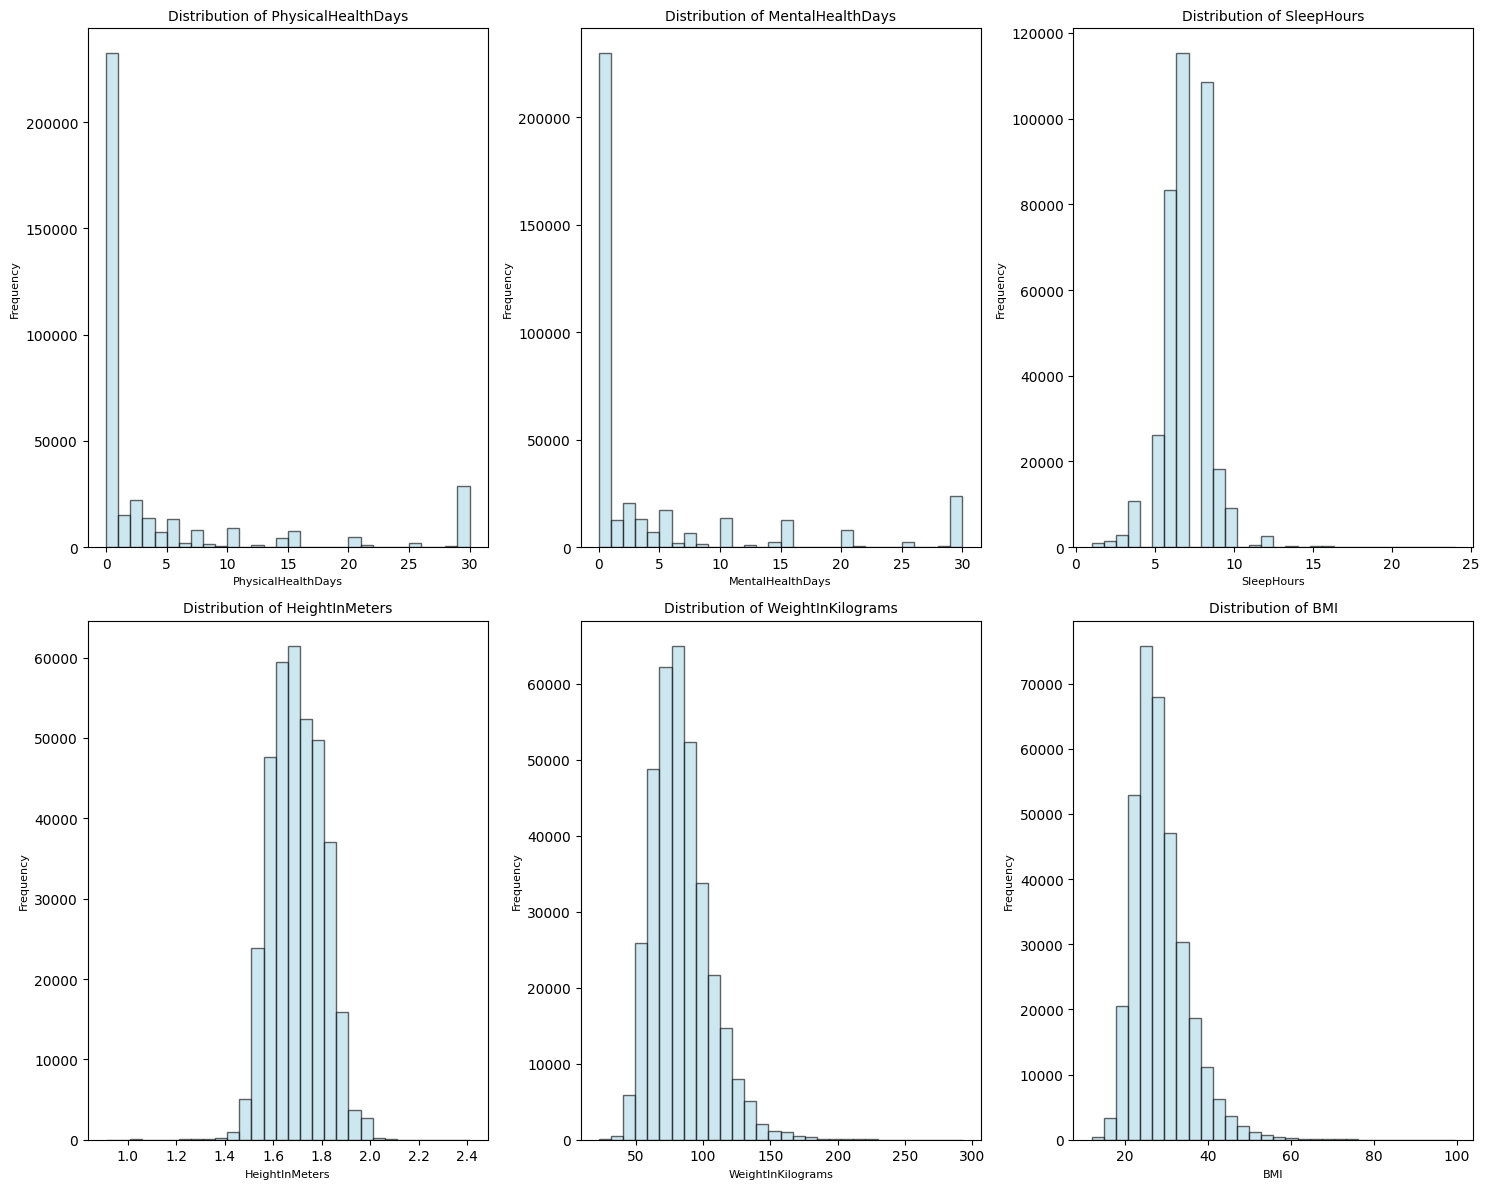

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# List of numeric columns (excluding categorical columns like 'HadHeartAttack', 'HadAngina', etc.)
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                   'HeightInMeters', 'WeightInKilograms', 'BMI']

# Convert numeric columns to numeric, coercing errors to NaN
for col in numeric_columns:
    heart_analysis[col] = pd.to_numeric(heart_analysis[col], errors='coerce')

# Set up the figure for plotting
plt.figure(figsize=(15, 12))

# Plot histograms for all numeric columns
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for plotting (adjust if necessary)
    plt.hist(heart_analysis[col].dropna(), bins=30, edgecolor='black', color='lightblue', alpha=0.6)  # Increase number of bins and reduce alpha for shorter bars
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


## Handling numerical missing values using either mean or median

In [42]:
import pandas as pd

# Assuming heart_analysis is already loaded with your data

# List of columns and their respective treatment based on distribution
skewed_columns = ['PhysicalHealthDays', 'MentalHealthDays']
normal_columns = ['SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

# Replace missing values based on distribution
for col in skewed_columns:
    median_value = heart_analysis[col].median()  # Get the median for skewed data
    heart_analysis[col] = heart_analysis[col].fillna(median_value)  # Replace missing with median

for col in normal_columns:
    mean_value = heart_analysis[col].mean()  # Get the mean for normally distributed data
    heart_analysis[col] = heart_analysis[col].fillna(mean_value)  # Replace missing with mean

# Check if there are still missing values
missing_values = heart_analysis.isnull().sum()
print(missing_values)

State                           0
Sex                             0
GeneralHealth                   0
PhysicalHealthDays              0
MentalHealthDays                0
LastCheckupTime              7261
PhysicalActivities              0
SleepHours                      0
RemovedTeeth                    0
HadHeartAttack                  0
HadAngina                       0
HadStroke                       0
HadAsthma                       0
HadSkinCancer                   0
HadCOPD                         0
HadDepressiveDisorder           0
HadKidneyDisease                0
HadArthritis                    0
HadDiabetes                     0
DeafOrHardOfHearing             0
BlindOrVisionDifficulty         0
DifficultyConcentrating         0
DifficultyWalking               0
DifficultyDressingBathing       0
DifficultyErrands               0
SmokerStatus                    0
ECigaretteUsage                 0
ChestScan                       0
RaceEthnicityCategory           0
AgeCategory   

<Axes: >

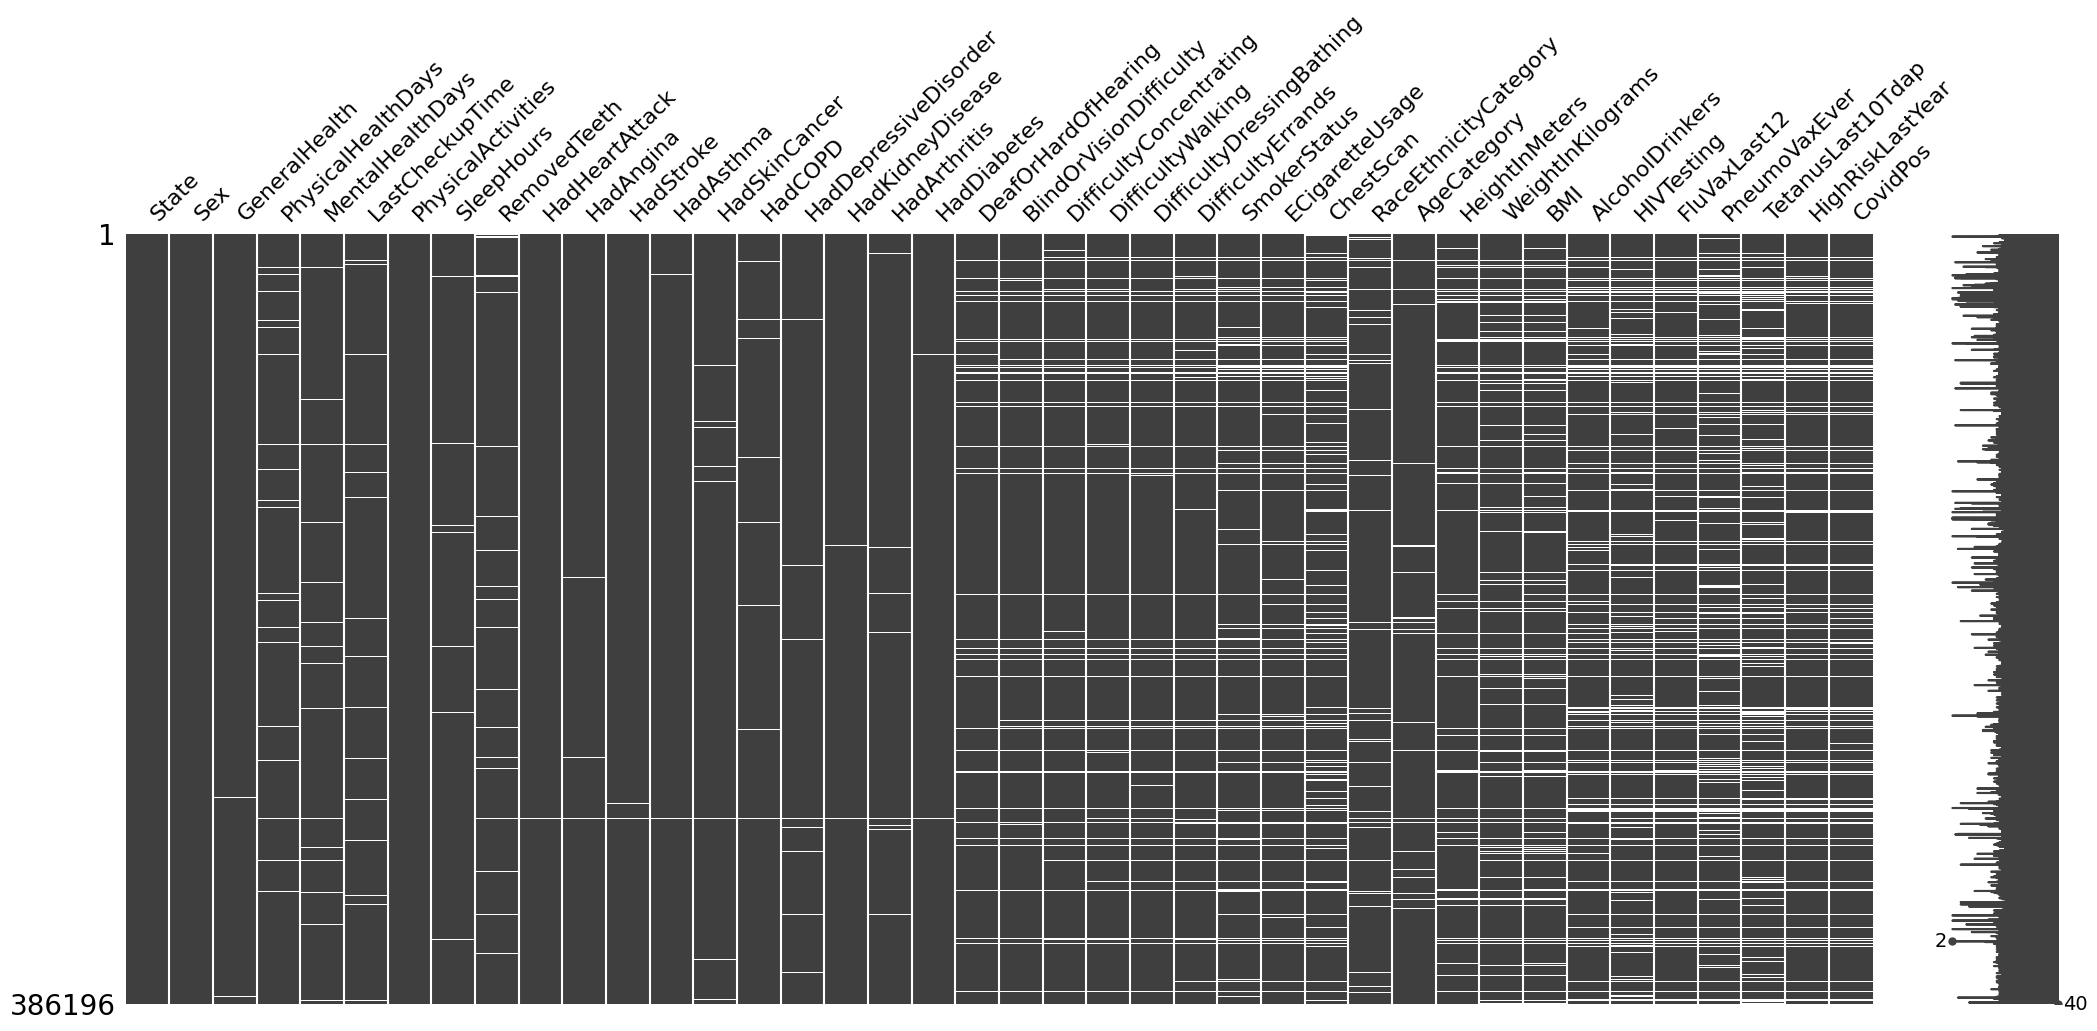

In [10]:
# Relationship of missing values
msn.matrix(heart_analysis)

In [11]:
heart_analysis.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')